In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import csv

[ 0.          8.8344252  16.68724761 23.55846721 29.44808401 34.35609801
 38.28250921 41.22731761 43.19052321 44.17212601 44.17212601 43.19052321
 41.22731761 38.28250921 34.35609801 29.44808401 23.55846721 16.68724761
  8.8344252   0.        ]
[[ 3.10e-09 -1.55e-09  0.00e+00 ...  0.00e+00  0.00e+00  0.00e+00]
 [-1.55e-09  4.65e-09 -1.55e-09 ...  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00 -1.55e-09  4.65e-09 ...  0.00e+00  0.00e+00  0.00e+00]
 ...
 [ 0.00e+00  0.00e+00  0.00e+00 ...  5.19e+00 -1.73e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 ... -1.73e+00  5.19e+00 -1.73e+00]
 [ 0.00e+00  0.00e+00  0.00e+00 ...  0.00e+00 -1.73e+00  3.46e+00]]
[[ 429.49124654  356.35088606  331.6665985   325.49089657  326.38488457
   329.97936237  334.60562526  339.62675919  344.80072668  350.03832938
   355.31400969  360.64029312  366.08031389  371.81094905  378.29969561
   386.77216753  400.43770966  427.69874269  490.55318397  646.59236522]
 [ 102.63160701  107.89481316  113.15801286  118.42120665 

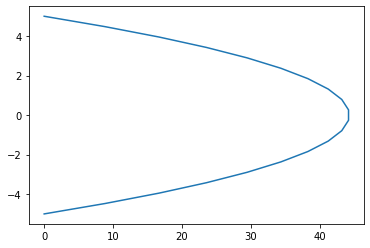

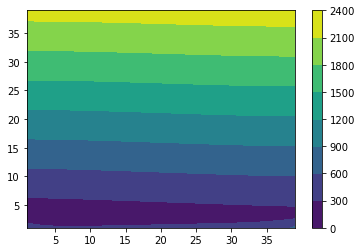

[ 429.49124654  356.35088606  331.6665985   325.49089657  326.38488457
  329.97936237  334.60562526  339.62675919  344.80072668  350.03832938
  355.31400969  360.64029312  366.08031389  371.81094905  378.29969561
  386.77216753  400.43770966  427.69874269  490.55318397  646.59236522
  102.63160701  107.89481316  113.15801286  118.42120665  123.68439476
  128.94757728  134.21075422  139.47392562  144.73709147  150.00025178
  155.26340656  160.52655579  165.78969949  171.05283765  176.31597026
  181.57909732  186.84221876  192.10533444  197.36844401  202.63154647
  224.34567047  227.09177189  230.97526877  235.41856904  240.17300058
  245.11269911  250.16615673  255.28960291  260.45468659  265.64177356
  270.83572766  276.0228042   281.18786715  286.3112826   291.36469997
  296.30434956  301.05872489  305.50196417  309.38540038  312.13145365
  343.3136325   345.15133514  348.23272131  352.10480016  356.47633939
  361.16406184  366.05157067  371.06364272  376.15027841  381.27642823
  386.

In [52]:
LX=40; LY=5; N = 20; M =20; # Geom descretization/mesh
miu=0.2822E-3; dP=-0.001; h=LY; # Properties

dX = LX/N;  dY = LY/M;   
store = np.zeros([])

Y = np.linspace(-LY,LY,M); 

U = (-dP)*((h**2)/(2*miu))*(1-((Y**2)/(h**2)))
print(U)
plt.plot(U,Y)

Lx=40; Ly=40; n = 20; m =20; nn=n*m; # Geom descretization/mesh
Ta=None; Tb=None; Tc=200; Td=None; Tcc=200; Tdd=200; Tin=100; Tout=200 # BCs
k=173; a=0.155E-6; # Properties
 
dx = Lx/n;  dy = Ly/m;   
store = np.zeros([])

x = np.linspace(dx/2,Lx-dx/2,n); y = np.linspace(dy/2,Ly-dy/2,m); [X, Y]=np.meshgrid(x,y); 

A=np.zeros([nn,nn]); b=np.zeros([nn]); d2=np.zeros([m,n])

dz=0.01;  G=k; qa=0; qb=0; qc=0; qd=10000; 

for j in range(m):
    if (j>1):
         for i in range(n): 
            P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n;

            Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; Su=0; Sp=0; Sua=qa*Aw; Sub=qb*Ae; Suc=qc*As; Sud=qd*An; 
            aW = G*Aw/dx; aE = G*Ae/dx; aN = G*An/dy; aS = G*As/dy;

            if(i>0): 
                A[P,W]=-aW; 
            else: 
                if Ta:
                    aW=0; Sp=Sp-2*G*Aw/dx; Su=Su + 2*G*Aw/dx*Ta;  
                else:
                    aW=0; Sp=Sp; Su=Sua + Su;

            if(i<n-1): 
                A[P,E]=-aE; 
            else:
                if Tb:
                    aE=0; Sp=Sp-2*G*Ae/dx; Su=Su + 2*G*Ae/dx*Tb;
                else:
                    aE=0; Sp=Sp; Su=Sub + Su;
            if(j>0): 
                A[P,S]=-aS; 
            else:
                if Tc:
                    aS=0; Sp=Sp-2*G*As/dy; Su=Su + 2*G*As/dy*Tc;
                else:
                    aS=0; Sp=Sp; Su=Suc + Su;           
            if(j<m-16): 
                A[P,N]=-aN; 
            else:
                if Td:
                    aN=0; Sp=Sp-2*G*An/dy; Su=Su + 2*G*An/dy*Td;
                else:
                    aN=0; Sp=Sp; Su=Sud + Su;           
            aP = aW + aE + aS + aN - Sp; 
            A[P,P] = aP; 
        #print(A[P,P])

        #print(P,W,E,N,S)
        
            b[P]=Su;
    else:
        for i in range(n): 
            P = j*n+i; W = P-1; E = P+1; N=P+n; S=P-n;

            Aw = dy*dz; Ae=Aw; An=dx*dz; As = An; 
            Dw = a*Aw/dx; De = a*Ae/dx; Dn = a*An/dx; Ds = a*As/dx;
            Fw = U[j]*Aw; 
            Fe = U[j]*Ae
            Su=0; Sp=0; dF= Fe-Fw; Sua=qa*Aw; Sub=qb*Ae; Suc=qc*As; Sud=qd*An; 
            aW = Dw + Fw/2; aE = De + Fe/2; aN = Dn; aS = Ds;

            if(i>0): 
                A[P,W]=-aW; 
            else: 
                if Tin:
                    aW=0; Sp=Sp -(2*Dw + Fe); Su=Su + (2*Dw + Fe)*Tin;  
                else:
                    aW=0; Sp=Sp; Su=Sua + Su;

            if(i<n-1): 
                A[P,E]=-aE; 
            else:
                if Tout:
                    aE=0; Sp=Sp-(2*De-Fw); Su=Su + (2*De - Fw)*Tout; 
                else:
                    aE=0; Sp=Sp; Su=Sub + Su;
            if(j>0): 
                A[P,S]=-aS; 
            else:
                if Tcc:
                    aS=0; Sp=aS; Su=Su + (Ds*Tcc);
                else:
                    aS=0; Sp=Sp; Su=Suc + Su;           
            if(j<m-1): 
                A[P,N]=-aN; 
            else:
                if Tdd:
                    aN=0; Sp=aN; Su=Su + (Dn*Tdd);
                else:
                    aN=0; Sp=Sp; Su=Sud + Su;           
            aP = aW + aE + aS + aN - Sp + dF; 
            A[P,P] = aP; 
            #print(A[P,P])

            #print(P,W,E,N,S)

            b[P]=Su;
            #print(aP)

            #store = np.column_stack((aW,aE,aN,aS,aP,Su))
            #store1 = np.row_stack((aN,aS,aW,aE,aP,Su))
            #store = np.append(store,store1)
            #print(store)
           # print(aW,aE,aN,aS,aP,Su)
  
print(A)
d=np.linalg.solve(A,b);
  

for j in range(m):
    for i in range(n):
        IN=j*n+i; d2[j,i]=d[IN];
print(d2) 
print(X)
print(Y)     
fig = plt.figure()
plt.contourf(X, Y, d2)
plt.colorbar()
plt.show()

#print("Max Temp =",max(d))
#print(d2)
#print(aP)
print(d)
#results = np.array()


### 